<a href="https://colab.research.google.com/github/Ashwinabj/Transfer-Learning/blob/main/Image%20Classification%20using%20Transfer%20Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import zipfile

In [2]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [3]:
import tensorflow as tf

ModuleNotFoundError: No module named 'tensorflow'

In [4]:
from tensorflow.keras.optimizers import Adagrad

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [6]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

In [7]:
import cv2

In [8]:
import PIL.Image as Image

In [9]:
import tensorflow_hub as hub

In [10]:
local_zip='/tmp/cat-dog.zip'
zip_ref=zipfile.ZipFile(local_zip,'r')
zip_ref.extractall('/tmp/cat-dog')
zip_ref.close()

train_cat_dir=os.path.join('/tmp/cat-dog/Cat')
train_dog_dir=os.path.join('/tmp/cat-dog/Dog')

train_cat_names=os.listdir(train_cat_dir)
train_dog_names=os.listdir(train_dog_dir)

In [11]:
print(train_cat_names[:5])
print(train_dog_names[:5])

['cat.618.jpg', 'cat.215.jpg', 'cat.756.jpg', 'cat.658.jpg', 'cat.968.jpg']
['dog.920.jpg', 'dog.431.jpg', 'dog.321.jpg', 'dog.418.jpg', 'dog.685.jpg']


In [12]:
print(len(train_cat_names))
print(len(train_dog_names))

1000
1000


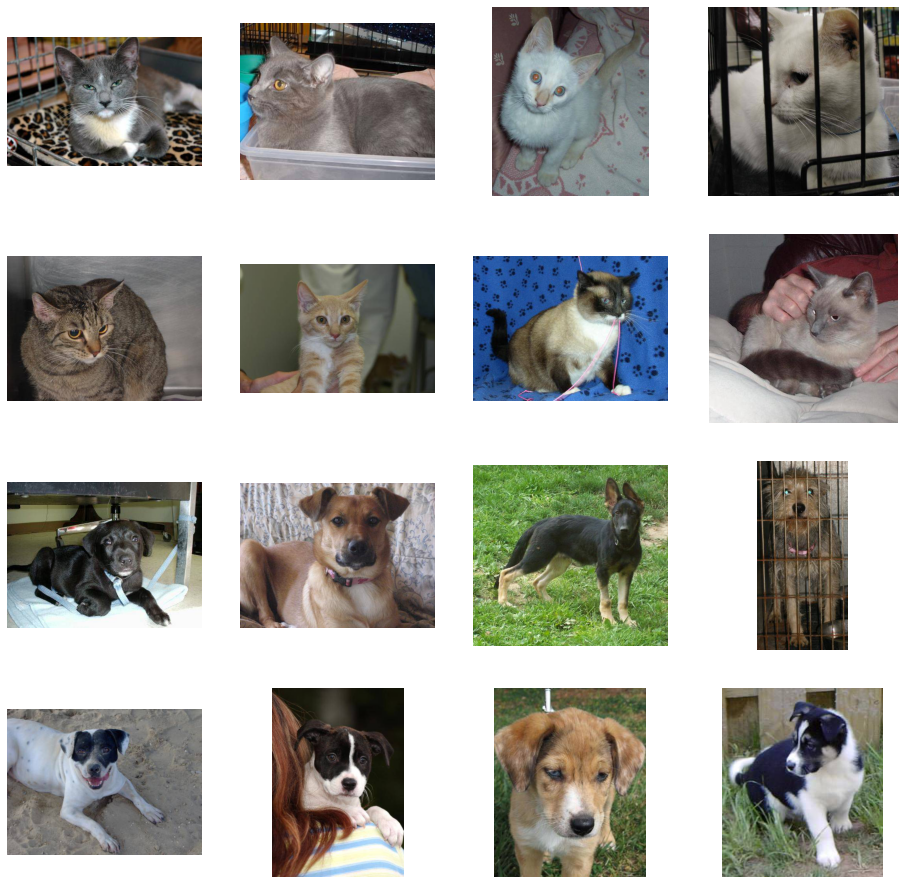

In [13]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0



fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_cat_pix = [os.path.join(train_cat_dir, fname) 
                for fname in train_cat_names[pic_index-8:pic_index]]
next_dog_pix = [os.path.join(train_dog_dir, fname) 
                for fname in train_dog_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_cat_pix+next_dog_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

In [14]:
feature_extractor_model="https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/2"
pretrained_model_without_top_layer=hub.KerasLayer(
    feature_extractor_model,input_shape=(224,224,3),trainable=False
)

In [15]:
num_of_classes=2
model=tf.keras.models.Sequential([
                     pretrained_model_without_top_layer,tf.keras.layers.Dense(num_of_classes,activation='sigmoid')             
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 2)                 2562      
                                                                 
Total params: 2,260,546
Trainable params: 2,562
Non-trainable params: 2,257,984
_________________________________________________________________


In [16]:
from tensorflow.keras.optimizers import RMSprop
model.compile(optimizer=RMSprop(lr=0.001),loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [17]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen=ImageDataGenerator(rescale=1/255,validation_split=0.3)

train_generator=train_datagen.flow_from_directory(
    '/tmp/cat-dog/',
    target_size=(224,224),
    class_mode='binary',
    subset='training'
)

validation_generator=train_datagen.flow_from_directory(
     '/tmp/cat-dog/',
     target_size=(224,224),
     class_mode='binary',
     subset='validation'
)

es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10, restore_best_weights = True)

Found 1400 images belonging to 2 classes.
Found 600 images belonging to 2 classes.


In [18]:
history=model.fit(
    train_generator,
    validation_data= validation_generator,
    callbacks = [es],
    epochs=100,
)

Epoch 1/100


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


44/44 [==============================] - 63s 1s/step - loss: 0.2480 - accuracy: 0.9043 - val_loss: 0.0861 - val_accuracy: 0.9700
Epoch 2/100
44/44 [==============================] - 55s 1s/step - loss: 0.0720 - accuracy: 0.9743 - val_loss: 0.0512 - val_accuracy: 0.9767
Epoch 3/100
44/44 [==============================] - 57s 1s/step - loss: 0.0463 - accuracy: 0.9836 - val_loss: 0.0406 - val_accuracy: 0.9817
Epoch 4/100
44/44 [==============================] - 56s 1s/step - loss: 0.0321 - accuracy: 0.9893 - val_loss: 0.0477 - val_accuracy: 0.9800
Epoch 5/100
44/44 [==============================] - 62s 1s/step - loss: 0.0260 - accuracy: 0.9929 - val_loss: 0.0350 - val_accuracy: 0.9867
Epoch 6/100
44/44 [==============================] - 61s 1s/step - loss: 0.0209 - accuracy: 0.9943 - val_loss: 0.0306 - val_accuracy: 0.9850
Epoch 7/100
44/44 [==============================] - 59s 1s/step - loss: 0.0141 - accuracy: 0.9964 - val_loss: 0.0340 - val_accuracy: 0.9867
Epoch 8/100
44/44 [======

In [19]:
result1=model.evaluate(train_generator)
result2=model.evaluate(validation_generator)
print(result1[1]*100,result2[1]*100)

19/19 [==============================] - 17s 879ms/step - loss: 0.0267 - accuracy: 0.9883
100.0 98.83333444595337


Saving images.jfif to images.jfif


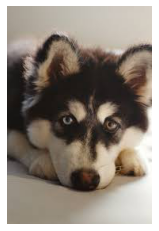

This is an image of Dog


In [23]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

class_names=['Cat','Dog']

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = '/content/' + fn

  sp = plt.subplot(1,1,1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(path)
  plt.imshow(img)

  plt.show()
  
  img = image.load_img(path, target_size=(224, 224))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  
  print("This is an image of "+class_names[np.argmax(classes)])